# Failures Prediciton
This jupyter notebook describes how to train a ML model for predicting failures of devices in the factory.

#### Download data
The first step is downloading data. We use here a publicly available dataset. Let's download telemetry and failures  csv files.

In [2]:
import os
import urllib.request


REPOSITORY_PATH = "https://github.com/DeeptiChevvuri/Predictive-Maintenance-Modelling-Datasets/raw/master/"
TELEMETRY_FILE_NAME = "telemetry.csv"
FAILURES_FILE_NAME = "failures.csv"
DATA_FOLDER = "./data"


telemetry_path = os.path.join(DATA_FOLDER, TELEMETRY_FILE_NAME)
failures_path = os.path.join(DATA_FOLDER, FAILURES_FILE_NAME)

os.makedirs(DATA_FOLDER, exist_ok=True)


if not os.path.isfile(telemetry_path):
    urllib.request.urlretrieve(REPOSITORY_PATH + TELEMETRY_FILE_NAME, telemetry_path)
    
if not os.path.isfile(failures_path):
    urllib.request.urlretrieve(REPOSITORY_PATH + FAILURES_FILE_NAME, failures_path)

#### Read and prepare datasets
Now we are ready to read the datasets into pandas dataframes

In [3]:
import pandas as pd


telemetry_df = pd.read_csv(telemetry_path) 
telemetry_df

,datetime,machineID,volt,rotate,pressure,vibration
0,1/1/2015 6:00:00 AM,1,176.217853,418.504078,113.077935,45.087686
1,1/1/2015 7:00:00 AM,1,162.879223,402.747490,95.460525,43.413973
2,1/1/2015 8:00:00 AM,1,170.989902,527.349825,75.237905,34.178847
3,1/1/2015 9:00:00 AM,1,162.462833,346.149335,109.248561,41.122144
4,1/1/2015 10:00:00 AM,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,1/1/2016 2:00:00 AM,100,179.438162,395.222827,102.290715,50.771941
876096,1/1/2016 3:00:00 AM,100,189.617555,446.207972,98.180607,35.123072
876097,1/1/2016 4:00:00 AM,100,192.483414,447.816524,94.132837,48.314561
876098,1/1/2016 5:00:00 AM,100,165.475310,413.771670,104.081073,44.835259


In real scenarios it's often better to run a separate model for each machine. It might be a separately trained model or just a fine tuned one. In current example scenario we are going to train one model for all machines. However, it's necessary first to ensure that the telemetry values do not differ too much. Box plots are very helpful for checking it.

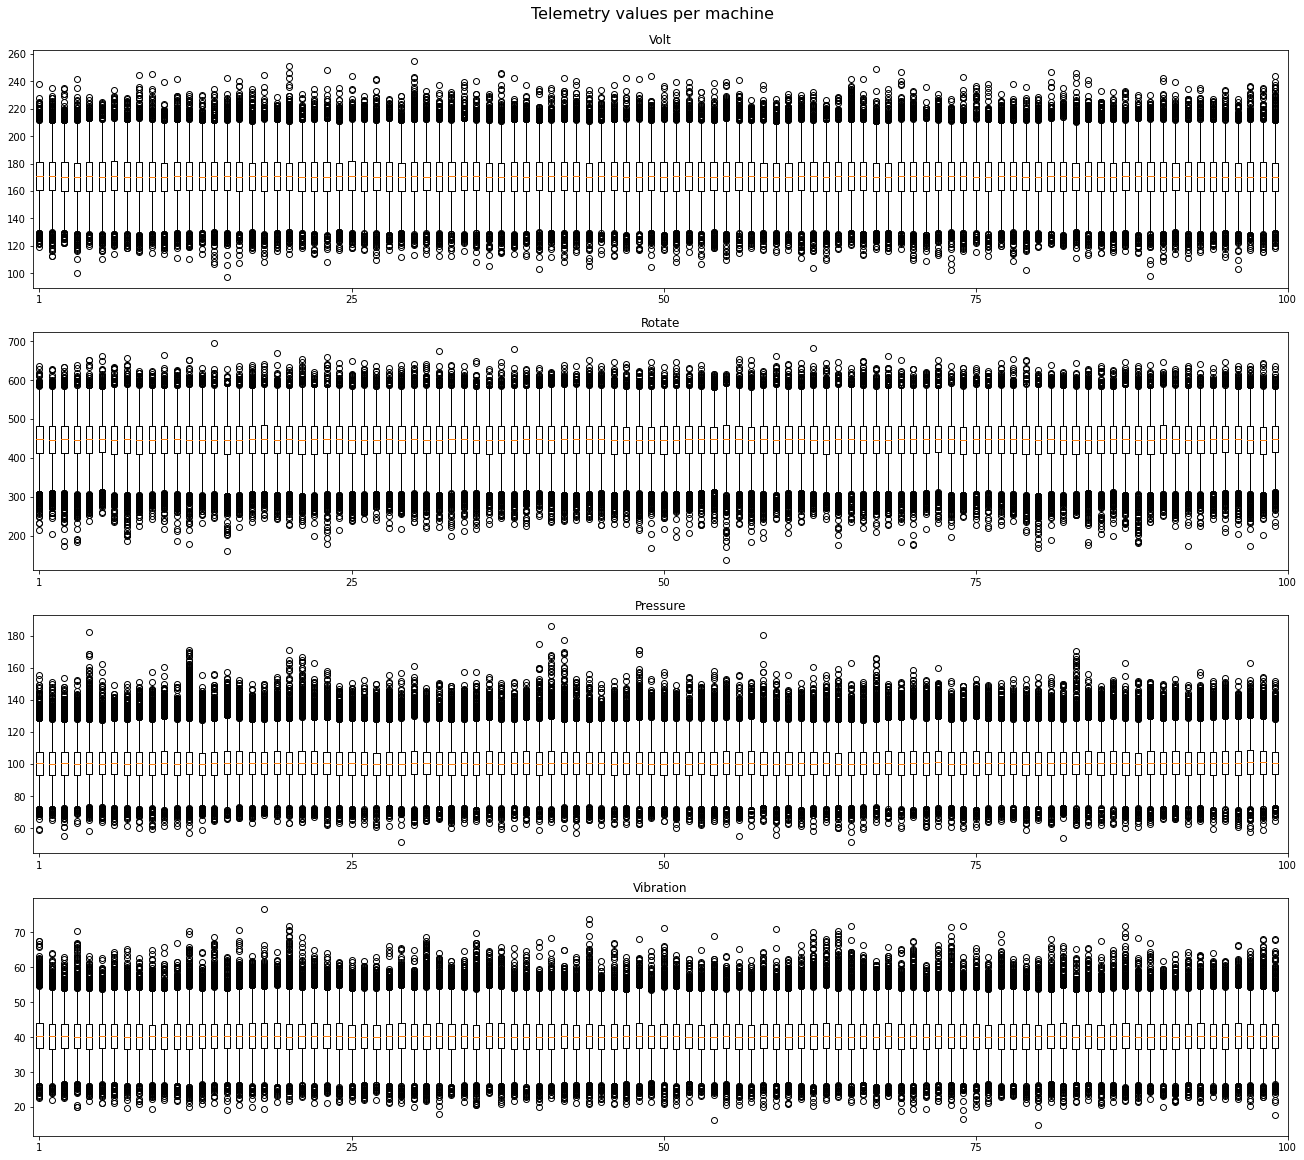

In [27]:
import matplotlib.pyplot as plt
import numpy as np


volt_values = []
rotate_values = []
pressure_values = []
vibration_values = []

for i in range(1,101):
    volt_values.append(telemetry_df[telemetry_df['machineID'] == i]["volt"])
    rotate_values.append(telemetry_df[telemetry_df['machineID'] == i]["rotate"])
    pressure_values.append(telemetry_df[telemetry_df['machineID'] == i]["pressure"])
    vibration_values.append(telemetry_df[telemetry_df['machineID'] == i]["vibration"])

    
fig, axs = plt.subplots(4, 1, constrained_layout=True, figsize=(18, 16))
fig.suptitle('Telemetry values per machine', fontsize=16)


def build_box_plot(plot_index, plot_values, title):
    axs[plot_index].boxplot(plot_values)
    axs[plot_index].set_title(title)
    axs[plot_index].set_xticks([1, 26, 51, 76, 101])
    axs[plot_index].set_xticklabels([1, 25, 50, 75, 100])

    
build_box_plot(0, volt_values, "Volt")
build_box_plot(1, rotate_values, "Rotate")
build_box_plot(2, pressure_values, "Pressure")
build_box_plot(3, vibration_values, "Vibration")
plt.show()